In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
# Lendo o CSV
quarters = pd.read_csv('quarters.csv')

In [166]:
quarters

,Salesman,Q1,Q2,Q3,Q4
0,Boris,602908,233879,354479,32704
1,Piers,43790,514863,297151,544493
2,Tommy,392668,113579,430882,247231
3,Travis,834663,266785,749238,570524
4,Cindy,580935,411379,110390,651572
5,Rob,656644,70803,375948,321388
6,Mike,486141,600753,742716,404995
7,Stacy,479662,742806,770712,2501
8,Alexandra,992673,879183,37945,293710


In [167]:
# Gerando arrays para apresentação no Gráfico
q1 = quarters['Q1'].values
q2 = quarters['Q2'].values
q3 = quarters['Q3'].values
q4 = quarters['Q4'].values

In [168]:
media = quarters[['Q1','Q2','Q3','Q4']].mean().values.mean()

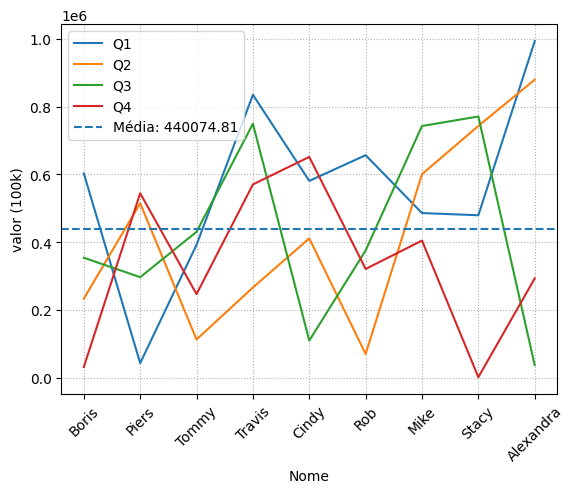

In [169]:
# Gerando gráfico utilizando o MatPlotLib
plt.plot(q1, label='Q1')
plt.plot(q2, label='Q2')
plt.plot(q3, label='Q3')
plt.plot(q4, label='Q4')

# linha da média
plt.axhline(y=media, label=f'Média: {media:.2f}', linestyle='--')

# Rótulos personalizados para o eixo X
salesman_labels = quarters['Salesman'].values
plt.xticks(ticks=range(len(salesman_labels)), labels=salesman_labels, rotation=45)

plt.xlabel('Nome')
plt.ylabel('valor (100k)')
plt.grid(which='major', linestyle=':')

plt.legend()

plt.show()

In [170]:
vendas_boris = quarters[['Q1','Q2','Q3','Q4']].iloc[0].values
quarters.columns[1:]


Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

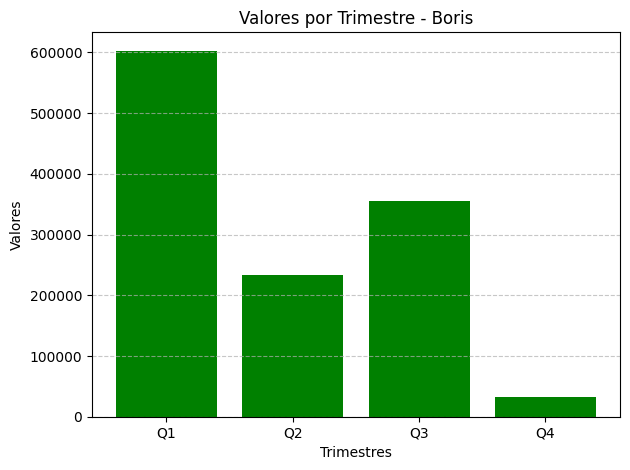

In [177]:
# Rótulos para cada barra (representando trimestres, por exemplo)
labels = quarters.columns[1:]

# Criar o gráfico de barras
plt.bar(
    x=labels, 
    height=vendas_boris, 
    color='g',
    )

# Adicionar título e rótulos aos eixos
plt.title('Valores por Trimestre - Boris')
plt.xlabel('Trimestres')
plt.ylabel('Valores')

# Exibir o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [172]:
vendas_por_trimestre = quarters[['Q1','Q2','Q3','Q4']].values
vendas_por_trimestre

array([[602908, 233879, 354479,  32704],
       [ 43790, 514863, 297151, 544493],
       [392668, 113579, 430882, 247231],
       [834663, 266785, 749238, 570524],
       [580935, 411379, 110390, 651572],
       [656644,  70803, 375948, 321388],
       [486141, 600753, 742716, 404995],
       [479662, 742806, 770712,   2501],
       [992673, 879183,  37945, 293710]], dtype=int64)

In [173]:
quarters['Salesman'].values

array(['Boris', 'Piers', 'Tommy', 'Travis', 'Cindy', 'Rob', 'Mike',
       'Stacy', 'Alexandra'], dtype=object)

In [174]:
# informa que será uma tabela de 9 vendedores x 4 colunas por trimestre.
vendas_por_trimestre.shape

(9, 4)

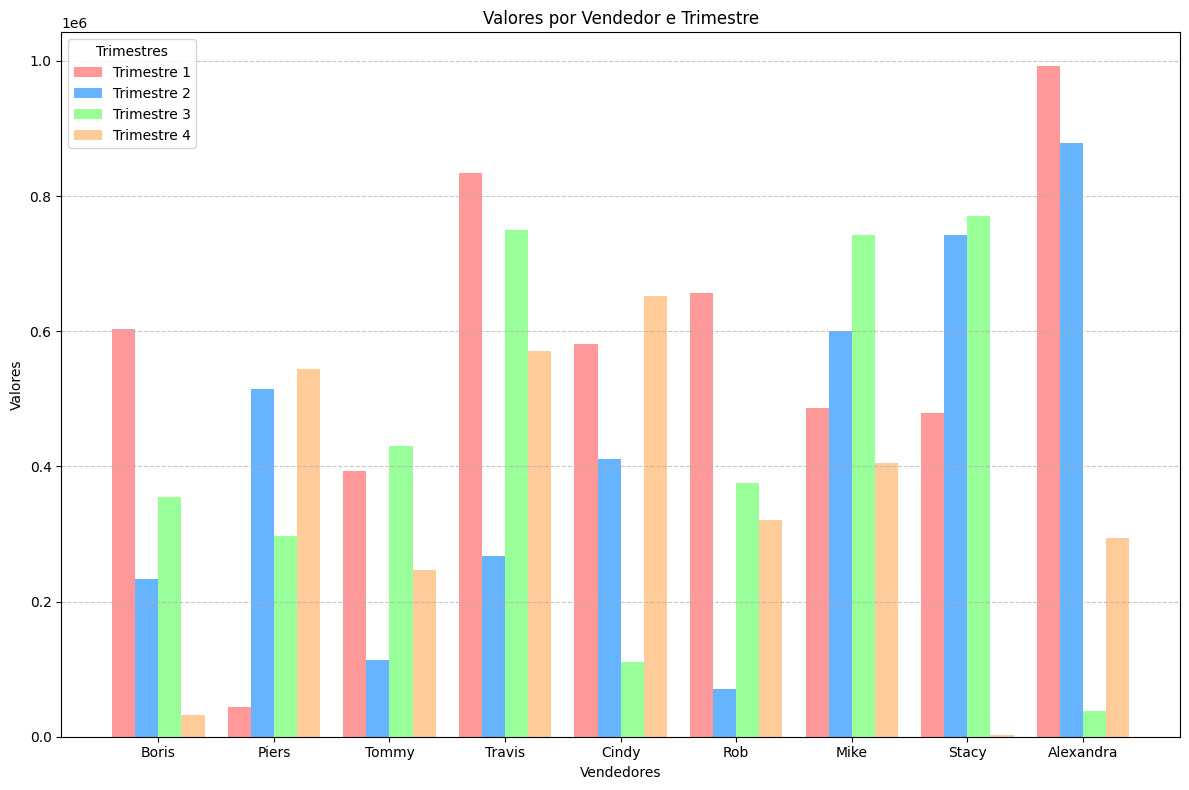

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Número de usuários e trimestres
num_usuarios, num_trimestres = vendas_por_trimestre.shape

# Índices das barras para cada usuário
indices = np.arange(num_usuarios) # array([0, 1, 2, 3, 4, 5, 6, 7, 8])

# Definir a largura de cada barra
largura_barra = 0.2

# Cores dos trimestres
cores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Criar a figura
plt.figure(figsize=(12, 8))

# Plotar as barras para cada trimestre (04 ciclos no for, por quarter):
for trimestre in range(num_trimestres):
    plt.bar(
        x=indices + trimestre * largura_barra,      # deslocar as 09 barras entre si
        height=vendas_por_trimestre[:, trimestre],  # valores do trimestre: 1º ciclo pega todos o valores em '0' em cada array.
        width=largura_barra,                        # largura da barra
        label=f'Trimestre {trimestre + 1}',         # legenda
        color=cores[trimestre]                      # cor da barra
    )

# Adicionar rótulos, título e legenda
plt.xlabel('Vendedores')
plt.ylabel('Valores')
plt.title('Valores por Vendedor e Trimestre')
plt.xticks(indices + largura_barra * 1.5, quarters['Salesman'].values)  # Definir os rótulos do eixo X
plt.legend(title='Trimestres')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()